In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [95]:
df_model = pd.read_csv('results_model.csv', index_col = 0)
df_agents = pd.read_csv('results_agents.csv', index_col = [0, 1])

In [96]:
sample_agent_1 = df_agents.loc[(slice(None) , 1) , :].reset_index(level = 1, drop = True)
sample_agent_2 = df_agents.loc[(slice(None) , 2) , :].reset_index(level = 1, drop = True)

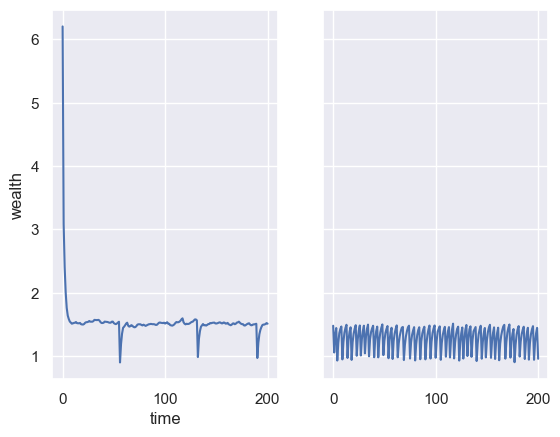

In [97]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey = True);
ax[0].plot(sample_agent_1.wealth);
ax[1].plot(sample_agent_2.wealth);
ax[0].set_ylabel('wealth');
ax[0].set_xlabel('time');

## Two random agents
The followint plots are for any two randomly selected agents. The simulation was run with {{df_agents.shape}}

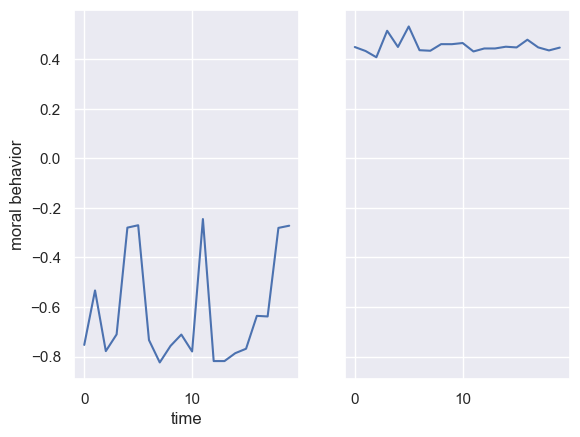

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey = True);
ax[0].plot(sample_agent_1.moral_behavior[:20]);
ax[1].plot(sample_agent_2.moral_behavior[:20]);
ax[0].set_ylabel('moral behavior');
ax[0].set_xlabel('time');

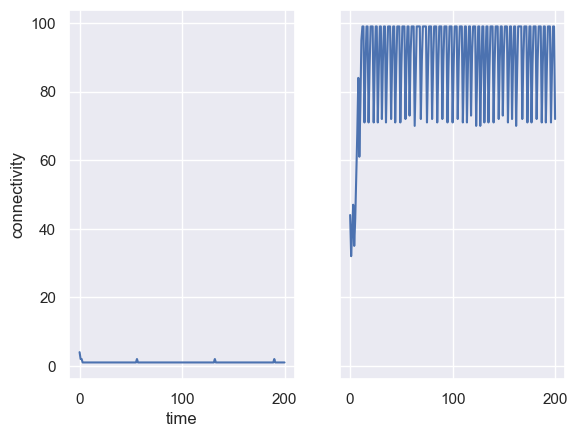

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey = True);
ax[0].plot(sample_agent_1.connectivity);
ax[1].plot(sample_agent_2.connectivity);
ax[0].set_ylabel('connectivity');
ax[0].set_xlabel('time');

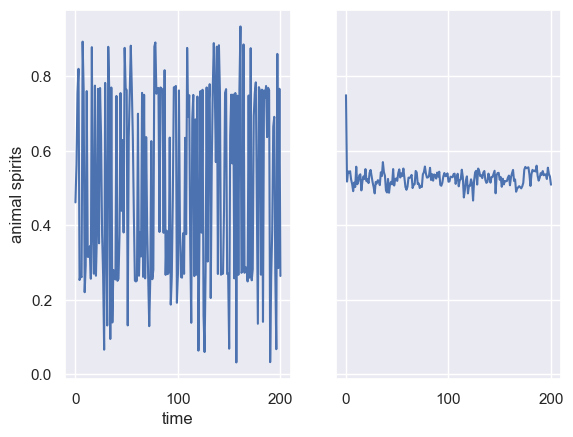

In [100]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey = True);
ax[0].plot(sample_agent_1.animal_spirits[:]);
ax[1].plot(sample_agent_2.animal_spirits[:]);
ax[0].set_ylabel('animal spirits');
ax[0].set_xlabel('time');

## Distributions

In [131]:
def create_partitions(arr, n):
  size = len(arr)

  if n >= size:
    return list(range(size))
  elif size == 1:
    return [0]
  else:
    return [int(np.floor(i*(size-1)/(n-1))) for i in range(n)]

def make_hist(col):
  global steps
  subsample_cross = create_partitions(range(df_model.shape[0]), 5)

  plt.figure(figsize=(20, 20 ))
  plt.subplots_adjust(hspace=0.2)
  plt.suptitle(f"{col} at t={[i for i in subsample_cross]}", fontsize=16, y=0.95)

  ncols = 3
  nrows = 3

  axes = []

  for n, ticker in enumerate(subsample_cross):
      #ax = plt.subplot(nrows, ncols, n + 1)
      axes.append(plt.subplot(nrows, ncols, n + 1))
      df_agents.loc[(ticker, slice(None)), col].hist(ax = axes[n], bins = 25)

  # for n in range(1, len(axes)):
  #   axes[0].sharex(axes[n])
  #   axes[0].sharey(axes[n])
  axes[0].sharex(*axes[1:])
  axes[0].sharey(*axes[1:])
  # axes[0].sharex(axes[1])
  # axes[0].sharey(axes[1])

TypeError: _AxesBase.sharex() takes 2 positional arguments but 5 were given

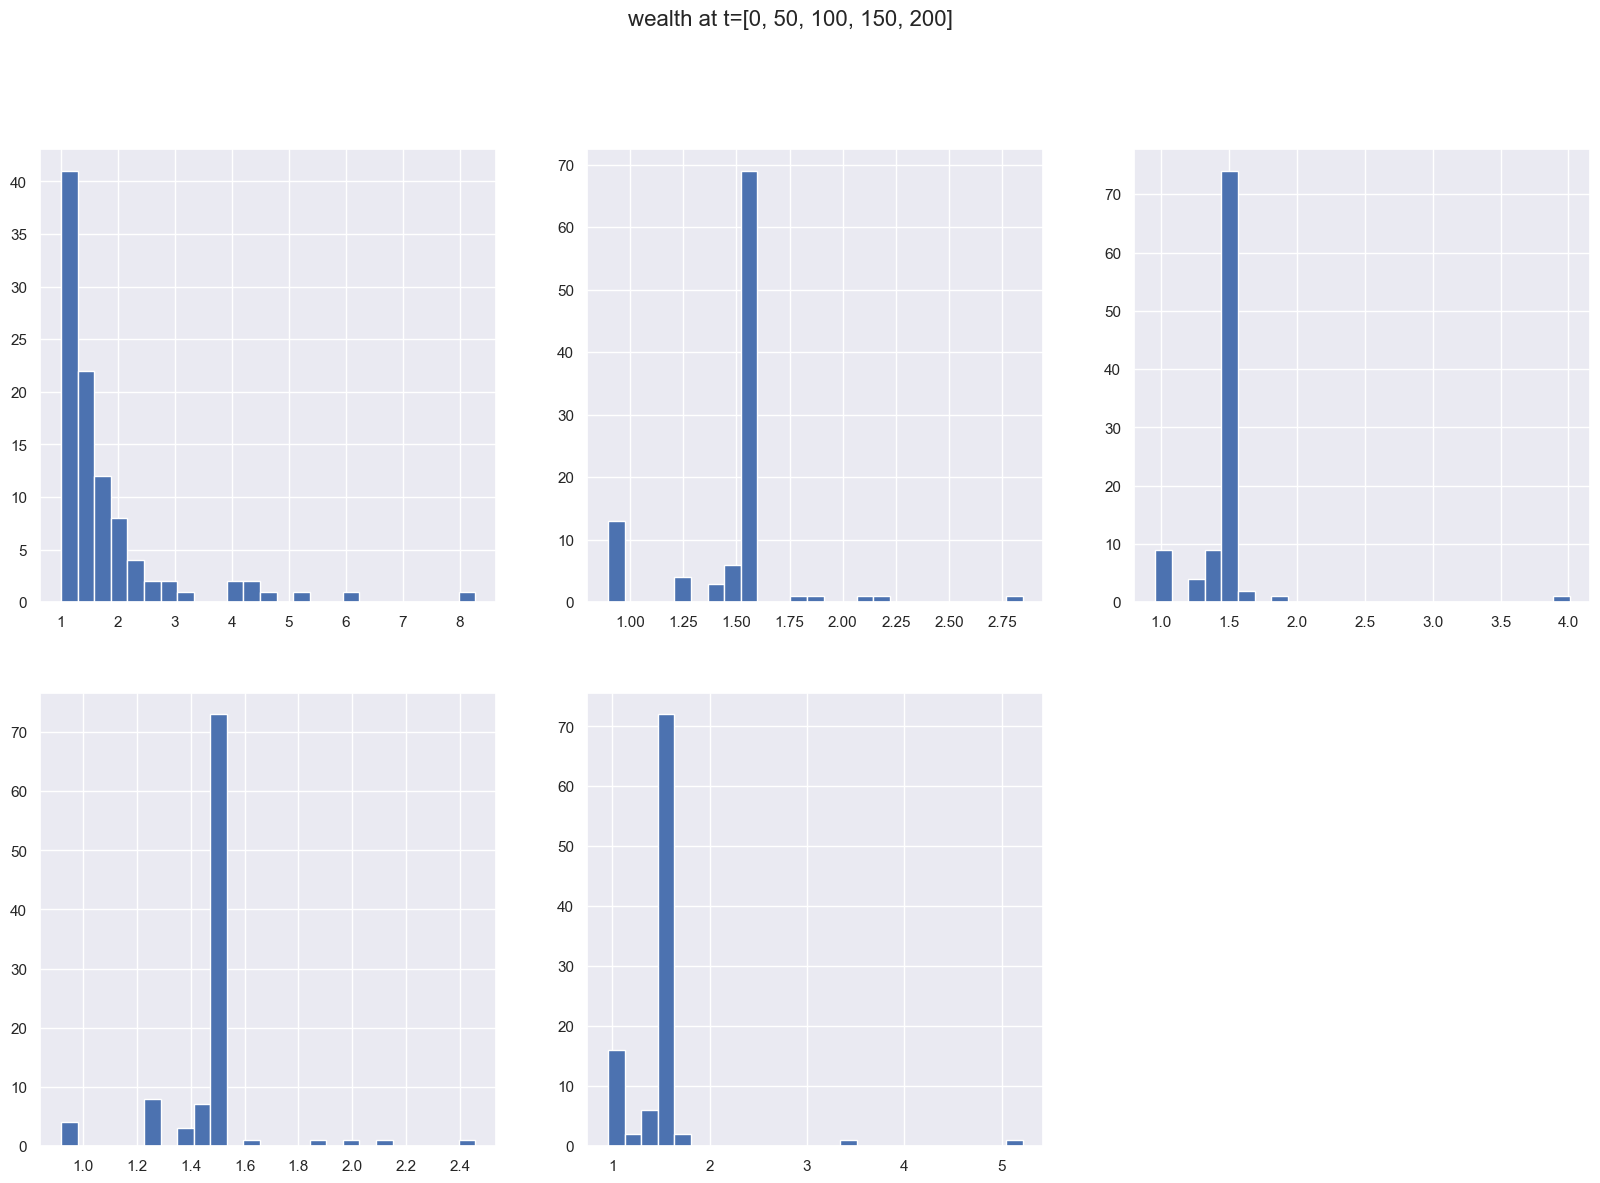

In [132]:
cols = ['wealth', 'animal_spirits', 'political_view', 'moral_behavior', 'consumption']
for c in cols:
  make_hist(c)

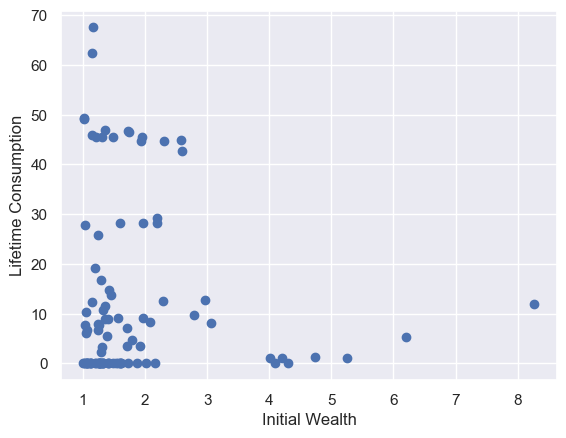

In [103]:
agents_lifetime_consumption = df_agents['consumption'].unstack().sum()
agents_initial_wealth = df_agents['wealth'].unstack().iloc[0,:]

plt.scatter(y = agents_lifetime_consumption, x = agents_initial_wealth);
plt.xlabel('Initial Wealth');
plt.ylabel('Lifetime Consumption');

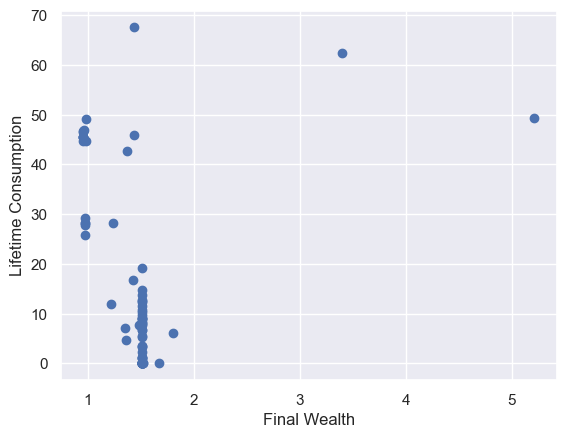

In [104]:
agents_final_wealth = df_agents['wealth'].unstack().iloc[df_model.shape[0] - 1,:]

plt.scatter(y = agents_lifetime_consumption, x = agents_final_wealth);
plt.xlabel('Final Wealth');
plt.ylabel('Lifetime Consumption');

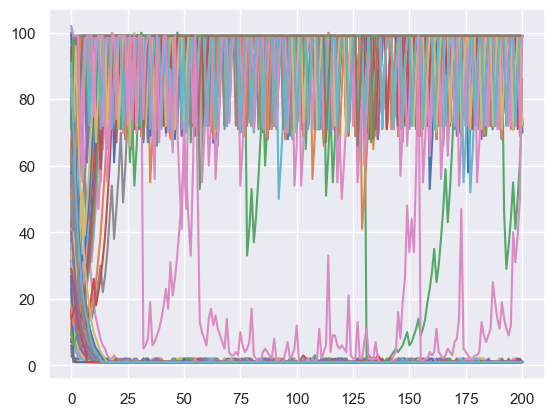

In [105]:
plt.plot(df_agents['connectivity'].unstack());

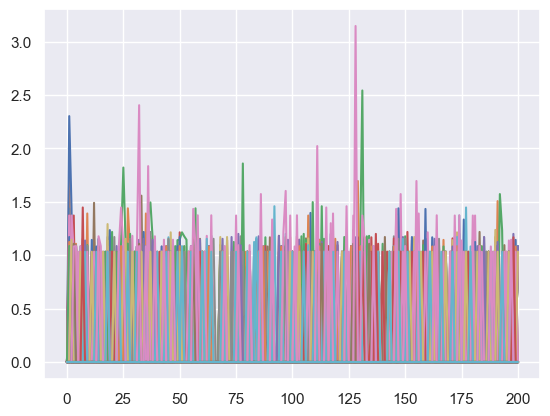

In [106]:
plt.plot(df_agents['consumption'].unstack());

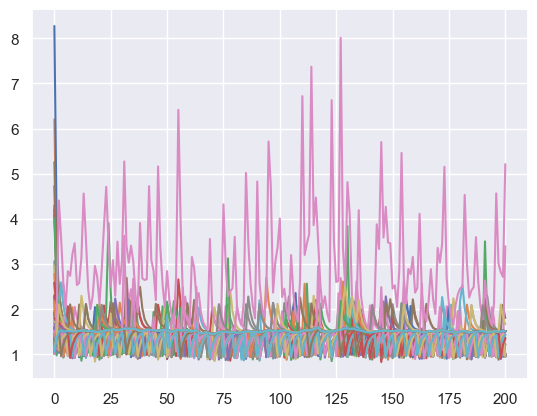

In [107]:
plt.plot(df_agents['wealth'].unstack());

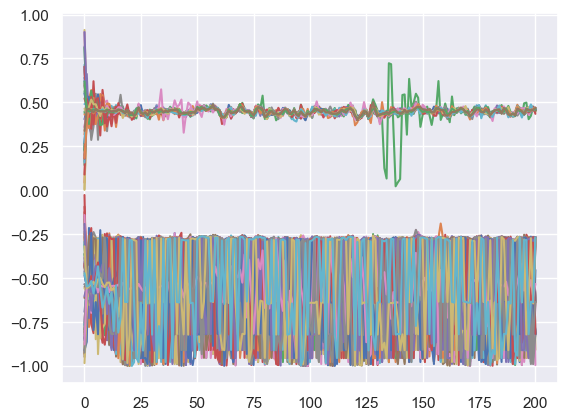

In [108]:
plt.plot(df_agents['moral_behavior'].unstack());

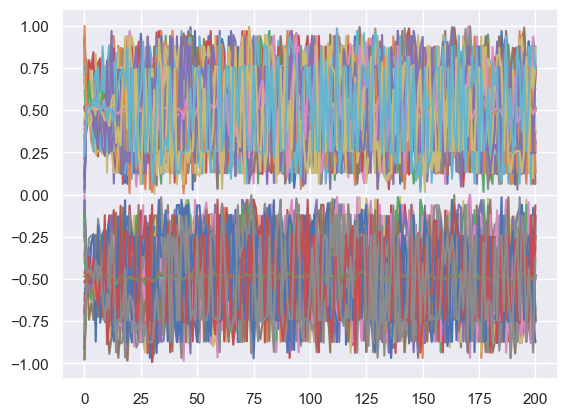

In [109]:
plt.plot(df_agents['political_view'].unstack());